In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
ds = pd.read_csv('fashion-mnist_test.csv')
ds.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data = np.array(ds)

In [6]:
print(data.shape)

(10000, 785)


In [7]:
x_data = data[:,1:]
y_data = data[:,0]
x_data=x_data/255.0

In [14]:
x_train = x_data[:8000,:]
x_val = x_data[8000:,:]
y_train = y_data[:8000]
y_val = y_data[8000:]


## Creating a 4 layer NN 

In [62]:
img_size = 28*28
H1_size = 256
H2_size = 64
out_size = 10   ## 10 different classes
BATCH_SIZE = 256
EPOCH = 50
ALPHA = 0.0003

In [63]:
def initializeWeights():
    model={}
    model['w1'] = np.random.randn(img_size,H1_size)/np.sqrt(img_size)
    model['b1'] = np.zeros((1,H1_size))
    model['w2'] =np.random.randn(H1_size,H2_size)/np.sqrt(H1_size)
    model['b2'] = np.zeros((1,H2_size))
    model['w3'] = np.random.randn(H2_size,out_size)/np.sqrt(H2_size)
    model['b3'] = np.zeros((1,out_size))
    
    return model
    
    

In [64]:
def forwaard_prop(model,x):
    z1 = x.dot(model['w1'])+model['b1']
    act_1= np.tanh(z1)
    z2 = act_1.dot(model['w2'])+model['b2']
    act_2 = np.tanh(z2)
    z3 = act_2.dot(model['w3'])+model['b3']
    fin_act = np.exp(z3)
    y_out = fin_act/np.sum(fin_act,axis = 1,keepdims=True)
    
    return act_1,act_2,y_out
    

In [65]:
def backward_prop(model,x,y,a1,a2,y_out):
    delta4 = y_out
    delta4[range(y.shape[0]),y]-=1
    dw3 = (a2.T).dot(delta4)
    db3 = np.sum(delta4,axis=0)
    delta3 = (1 - np.square(a2))*(delta4.dot(model['w3'].T))
    dw2 = (a1.T).dot(delta3)
    db2 = np.sum(delta3,axis=0)
    delta2 = (1 - np.square(a1))*(delta3.dot(model['w2'].T))
    dw1 = (x.T).dot(delta2)
    db1 = np.sum(delta2,axis = 0)
    
    
    model['w1'] -=ALPHA*dw1
    model['b1'] -=ALPHA*db1
    model['w2'] -=ALPHA*dw2
    model['b2'] -=ALPHA*db2
    model['w3'] -=ALPHA*dw3
    model['b3'] -=ALPHA*db3
    
    return model
    
    
    
    

In [66]:
def loss(model,p,y):
    correct_logprob = -np.log(p[range(y.shape[0]),y])
    l = np.sum(correct_logprob)
    return (1.0/y.shape[0])*l

# def loss(model, p, y):
#     correct_logprobs = -np.log(p[range(y.shape[0]),y])
#     l = np.sum(correct_logprobs)
    
#     return (1.0/y.shape[0]) * l

In [67]:
def predict(y_out):
    return np.argmax(y_out, axis = 1)
def accuracy(p,y):
#     print('In Accuracy \n')
#     print(np.sum(p==y))
    return ( 100.0* np.sum(p==y) / y.shape[0])

In [68]:
def main():
    training_loss = []
    val_loss=[]
    val_acc=[]
    
    model = initializeWeights()
    for ix in range(EPOCH):
        print ("\nEpoch : %d" %(ix+1))
        cnt = 0
        while (cnt+BATCH_SIZE)<y_train.shape[0]:
            batch_data = x_train[cnt:(cnt+BATCH_SIZE),:]
            batch_label = y_train[cnt:(cnt+BATCH_SIZE)]
            cnt+=BATCH_SIZE
        
            a1,a2,p = forwaard_prop(model,batch_data)
            model = backward_prop(model,batch_data,batch_label,a1,a2,p)
        _,_,p = forwaard_prop(model,x_train)
        training_loss.append(loss(model,p,y_train))
        print('Training Loss : %.3f' %loss(model,p,y_train))
        _,_,p=forwaard_prop(model,x_val)
        val_loss.append(loss(model,p,y_val))
        
        pred = predict(p)
        val_acc.append(accuracy(pred,y_val))
        print('Validation Loss : %.3f' %loss(model,p,y_val))
        print('Validation Accuracy : %.3f' %accuracy(pred,y_val))
    print('<---------DONE----------->')
    
    
    return training_loss,val_loss,val_acc
        

        

In [69]:
training_loss,val_loss,val_acc=main()


Epoch : 1
Training Loss : 0.992
Validation Loss : 0.996
Validation Accuracy : 66.850

Epoch : 2
Training Loss : 0.811
Validation Loss : 0.811
Validation Accuracy : 71.800

Epoch : 3
Training Loss : 0.721
Validation Loss : 0.718
Validation Accuracy : 75.050

Epoch : 4
Training Loss : 0.661
Validation Loss : 0.656
Validation Accuracy : 77.500

Epoch : 5
Training Loss : 0.618
Validation Loss : 0.612
Validation Accuracy : 78.800

Epoch : 6
Training Loss : 0.585
Validation Loss : 0.579
Validation Accuracy : 79.250

Epoch : 7
Training Loss : 0.560
Validation Loss : 0.554
Validation Accuracy : 80.000

Epoch : 8
Training Loss : 0.540
Validation Loss : 0.534
Validation Accuracy : 81.000

Epoch : 9
Training Loss : 0.523
Validation Loss : 0.519
Validation Accuracy : 81.500

Epoch : 10
Training Loss : 0.510
Validation Loss : 0.507
Validation Accuracy : 81.600

Epoch : 11
Training Loss : 0.498
Validation Loss : 0.498
Validation Accuracy : 81.900

Epoch : 12
Training Loss : 0.488
Validation Loss : 

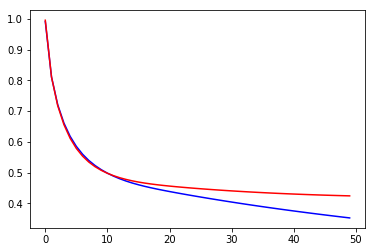

In [70]:
plt.figure(0)
plt.plot(training_loss,color='blue')
plt.plot(val_loss,color='red')
plt.show()

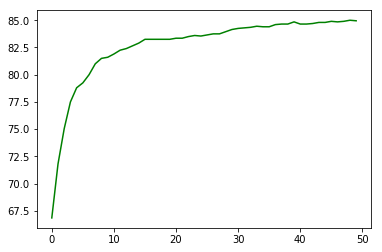

In [71]:
plt.figure(1)
plt.plot(val_acc,color='green')
plt.show()